# **Problem Statement**

Identify top countries that are in direst need of aid. Your job is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## **Steps:**
    
1. Reading and understanding data

2. Data Formatting

3. Performing EDA
        
4. Data Preparation for clustering
  - Outlier Treatment
  - Performing Scaling
  - Hopkins Check
    
5. Clustering using K-Means and Hierarchical Clustering
  *   K-Means Clustering:
    - Choose optimal value of K
    - Run K-means using optimal K
    - Visualize Clusters
    - Cluster profiling using "gdpp","child_mort" & "income"

  * Hierarchical Clustering:
    - Plot dendrogram using single and complete linkage
    - Choose optimal linkage
    - Visualize Clusters
    - Cluster profiling using "gdpp","child_mort" & "income"
      
6. Country Recommendation

# **1. Reading and understanding data**

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

pd.set_option("display.max_rows", None,"display.max_columns", None)

warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [ ]:
# Importing Country-data.csv
country_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Upgrad_NGO_Clustering_Assignment/Country-data.csv')

In [ ]:
# Reading head of the dataset
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Reading data dictionary
data_dict = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Upgrad_NGO_Clustering_Assignment/data-dictionary+.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


Based on data dictionary "exports","health" and "import" spendings are mentioned as percentages of "gdpp". For consistency we will be converting these to quantative measures later. 

In [ ]:
# Columns summary
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Based on above summary "dtypes" seems normal

In [ ]:
# Numerical columns statistical attributes
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
country_df.shape

(167, 10)

In [ ]:
# Checking for Null values
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no missing entries present in the dataset.

# **2. Data formatting**

In [ ]:
# Converting "exports","health" & "imports" into quantitive measures
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100

In [ ]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# **3. Performing EDA**

### **a) Univariate Analysis**

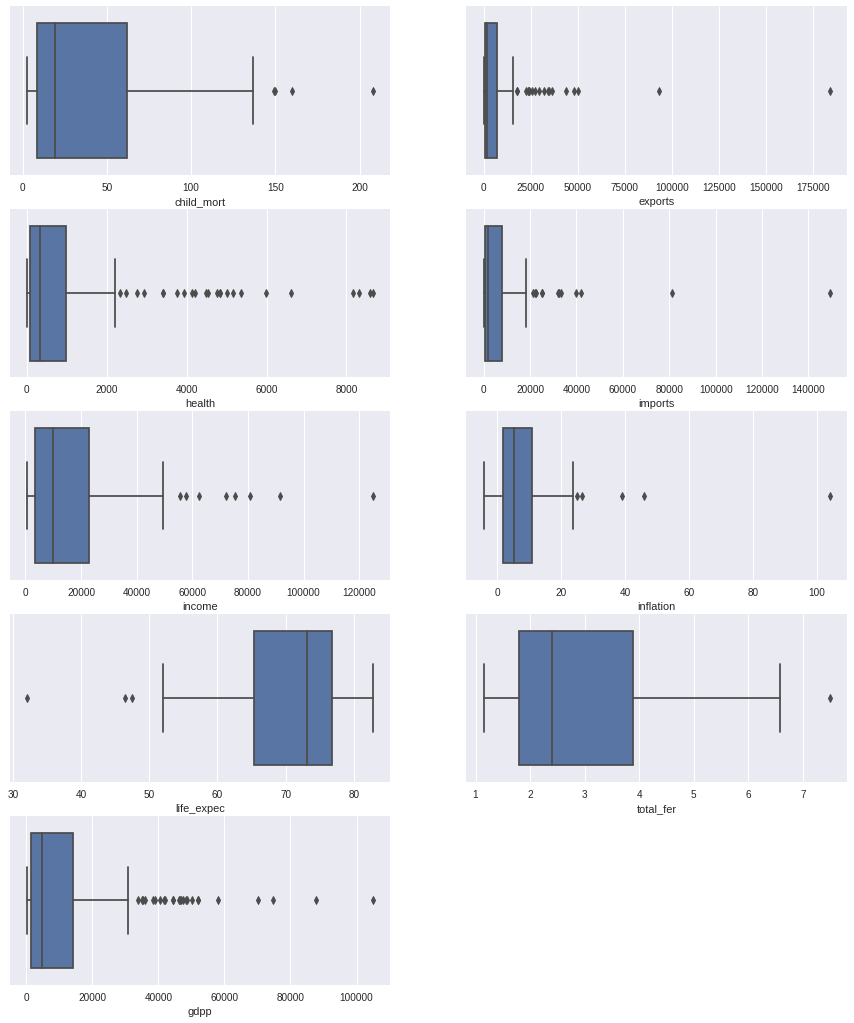

In [ ]:
# Visualizing Numerical columns using Boxplots
cols = country_df.columns[1:].tolist()
r = c = 0
fig,ax = plt.subplots(5,2,figsize=(15,18))

for n,i in enumerate(cols):
    sns.boxplot(x=cols[n], data=country_df,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

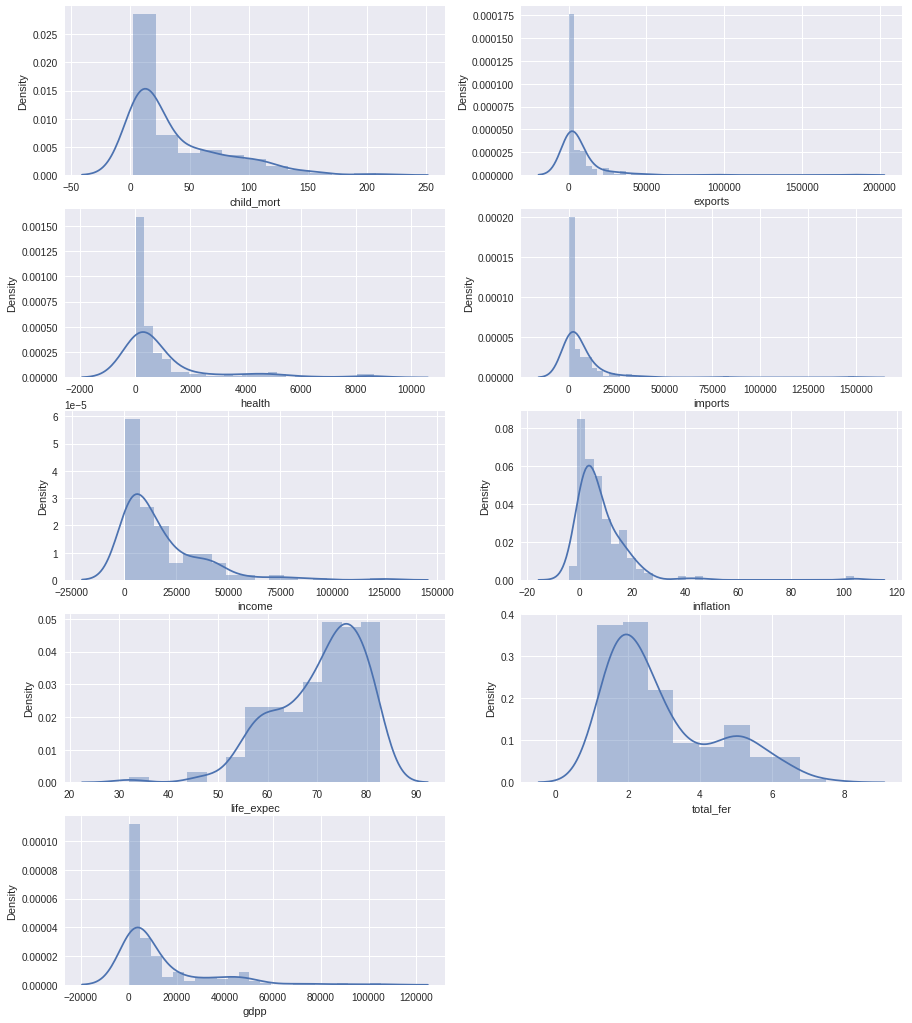

In [ ]:
# Visualizing Numerical columns using Distribution Plot 
cols = country_df.columns[1:].tolist()
r = c = 0
fig,ax = plt.subplots(5,2,figsize=(15,18))

for n,i in enumerate(cols):
    sns.distplot(country_df[cols[n]],ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

**Inferences**:
- Since health, import and export expenses are proportions of gdpp, all of them follow similar trend.
- There couple of countries which have child_mort greater than 150 and life_excpec below 50. We will perform bivariate analysis later to find if there is any correlation.
- Based on above plots 'health','imports','exports','income' & 'gdpp' are having outliers, which need to be treated. As outliers impact cluster formation.

### **c) Bivariate Analysis**

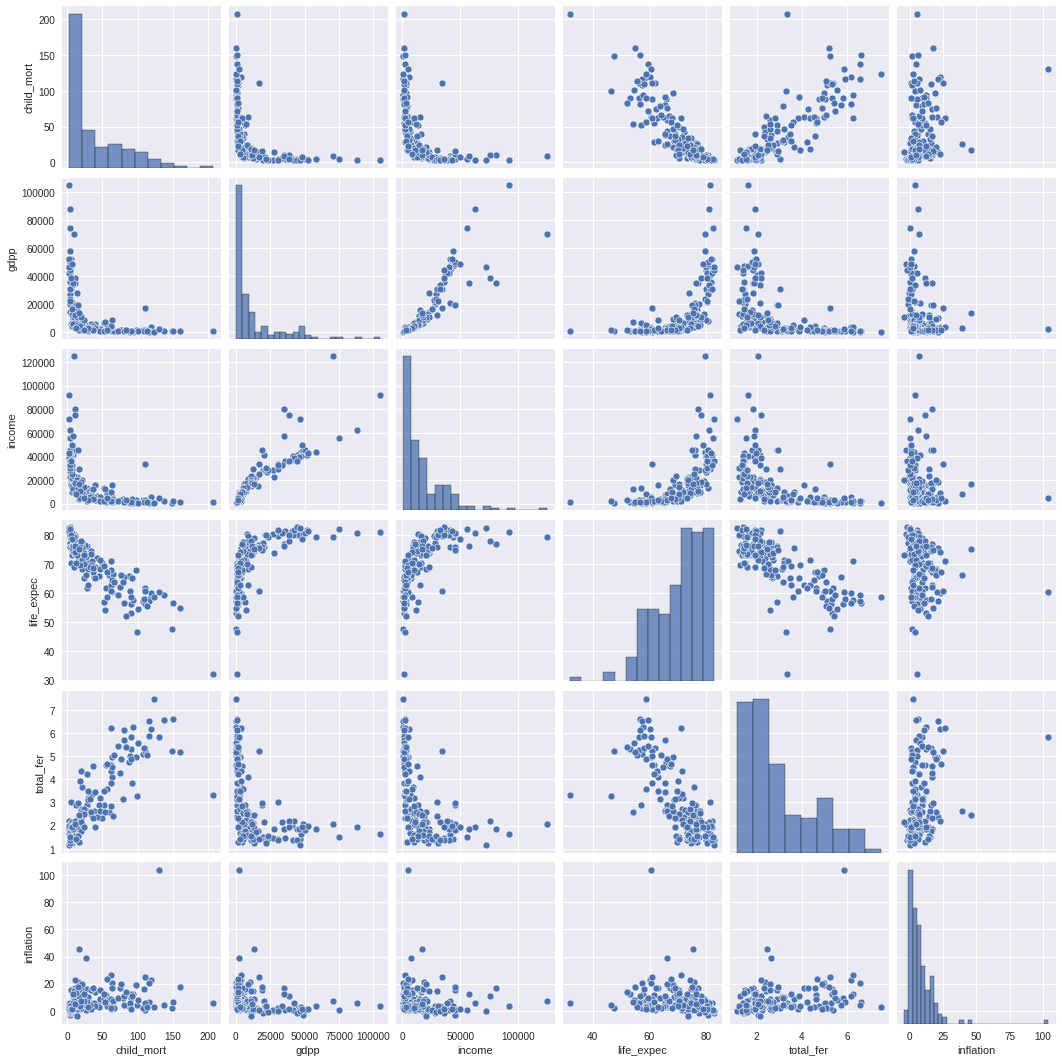

In [ ]:
# Since all columns are numerical, we can plot scatterplots to gain insights.
cols = ["child_mort","gdpp","income","life_expec","total_fer","inflation"]
sns.pairplot(country_df[cols])
plt.show()

**Inferences:**
- "child_mort" and "gdpp" are showing an inverse relationship, which is expected due to better healthcare service. As healthcare expenses are directly proportional to GDP.
- As can be seen "life_expec" and "child_mort" are having an inverse linear relationship, as smaller value of "child_mort" leads to better "life_expec".
- Usually countries with higher GDP have better standard of living, which explains the linear relationship between "income" and "gdpp".

# **4. Data Preparation for clustering**

### **a) Outlier Treatment**

Clustering algorithms use distance as a metric for cluster formation. Thus presence of outlier may drastically vary the final outcome. So, before proceeding any further we need to treat these outliers by capping them.

In [ ]:
# Checking 0th, 5th, 95th, 99th and 100th percentile of numerical columns
country_df.quantile([0,0.05,0.95,0.99,1])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0.00,2.60,1.07692,12.82120,0.651092,609.0,-4.2100,32.10,1.1500,231.0
0.05,3.46,70.46880,26.71592,169.281000,1213.0,0.1834,55.78,1.3900,465.9
0.95,116.00,31385.10000,4966.70100,24241.560000,48290.0,20.8700,81.40,5.8610,48610.0
0.99,153.40,64794.26000,8410.33040,55371.390000,84374.0,41.4780,82.37,6.5636,79088.0
1.00,208.00,183750.00000,8663.60000,149100.000000,125000.0,104.0000,82.80,7.4900,105000.0


As observed outliers are present in 'child_mort', 'inflation', 'health' 'imports', 'exports', 'income' & 'gdpp'. Since our aim is to identify the countries which need aid, we cannot aggrissively cap variables such as  'child_mort' & 'inflation' as it will affect our analysis.

In [ ]:
# Capping 'health','imports','exports','income','gdpp' to 0.95 percentile

high_cap = ['health','imports','exports','income','gdpp']
cap = 0.95
for col in high_cap:
  country_df[col][country_df[col] > country_df[col].quantile(cap)] = country_df[col].quantile(cap)

In [ ]:
country_df[["child_mort","inflation"]].quantile([0.99,1])

,child_mort,inflation
0.99,153.4,41.478
1.00,208.0,104.000


In [ ]:
# We are capping "child_mort" & "inflation" only at 99th percentile for better cluster formation
country_df["inflation"][country_df["inflation"] > country_df["inflation"].quantile(0.99)] = country_df["inflation"].quantile(0.99)
country_df["child_mort"][country_df["child_mort"] > country_df["child_mort"].quantile(0.99)] = country_df["child_mort"].quantile(0.99)

**Plotting boxplots after treating outliers**

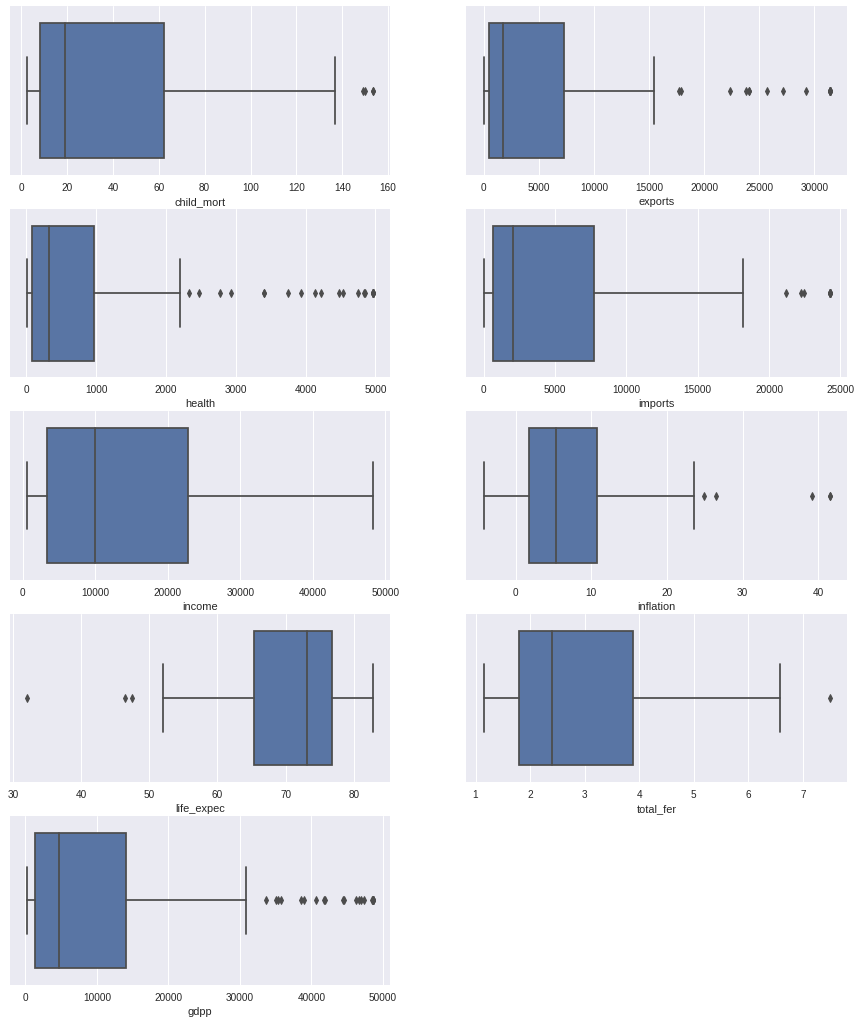

In [ ]:
# Visualizing Numerical columns using Boxplots
cols = country_df.columns[1:].tolist()
r = c = 0
fig,ax = plt.subplots(5,2,figsize=(15,18))

for n,i in enumerate(cols):
    sns.boxplot(x=cols[n], data=country_df,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

### **b) Feature Scaling**

In [ ]:
# Performing scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
country_df_scaled = scaler.fit_transform(country_df[country_df.columns[1:]])
country_df_scaled = pd.DataFrame(country_df_scaled,columns=country_df.columns[1:])
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.669581,-0.629435,-0.732729,-0.958349,0.265002,-1.619092,1.902882,-0.757362
1,-0.547497,-0.542172,-0.473489,-0.472182,-0.394006,-0.372075,0.647866,-0.859973,-0.523321
2,-0.272510,-0.475838,-0.530017,-0.560152,-0.192552,1.122161,0.670423,-0.038404,-0.498838
3,2.084159,-0.418960,-0.588935,-0.543087,-0.667360,1.932987,-1.179234,2.128151,-0.560376
4,-0.709406,-0.027134,-0.150685,0.306422,0.227992,-0.764618,0.704258,-0.541946,0.013312


### **c) Hopkins Test**

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [ ]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
for i in range(5):
  print('Hopkins statistic value is:',round(hopkins(country_df_scaled),3))

Hopkins statistic value is: 0.885
Hopkins statistic value is: 0.866
Hopkins statistic value is: 0.869
Hopkins statistic value is: 0.863
Hopkins statistic value is: 0.856


As outcome of Hopkins test is greater than 0.7, thus the dataset has high clustering tendency.

# **5. Clustering using K-Means and Hierarchical Clustering**

## **i) K-means Clustering**

### **a) Finding Optimal value of K**

#### **Elbow Method**

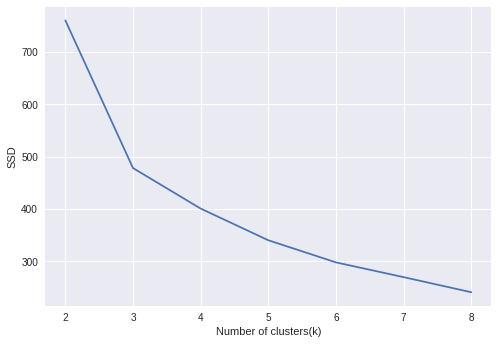

In [ ]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(range_n_clusters,ssd)
plt.xlabel('Number of clusters(k)')
plt.ylabel('SSD')
plt.show()

Based on above "elbow" curve, **k=3** seems to be the optimal number of clusters.

#### **Silhouette Analysis**

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, round(silhouette_avg,2)))

For n_clusters=2, the silhouette score is 0.48
For n_clusters=3, the silhouette score is 0.42
For n_clusters=4, the silhouette score is 0.38
For n_clusters=5, the silhouette score is 0.38
For n_clusters=6, the silhouette score is 0.29
For n_clusters=7, the silhouette score is 0.31
For n_clusters=8, the silhouette score is 0.3


Using silhouette analysis k=2 seems to be the optimal number of clusters. However, as per business requirement having 3 clusters would make more sense. Since we can segment the countries into high, moderate and low based on their development.

### **b) Run K-means using optimal K**

In [ ]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=1)
kmeans.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [ ]:
# Adding cluster labels to master dataframe
country_df['cluster_id'] = kmeans.labels_

In [ ]:
# Number of countries per cluster
country_df['cluster_id'].value_counts()

0    82
2    48
1    37
Name: cluster_id, dtype: int64

### **c) Visualizing Clusters**

Visualizing Clusters characterstics using boxplots.

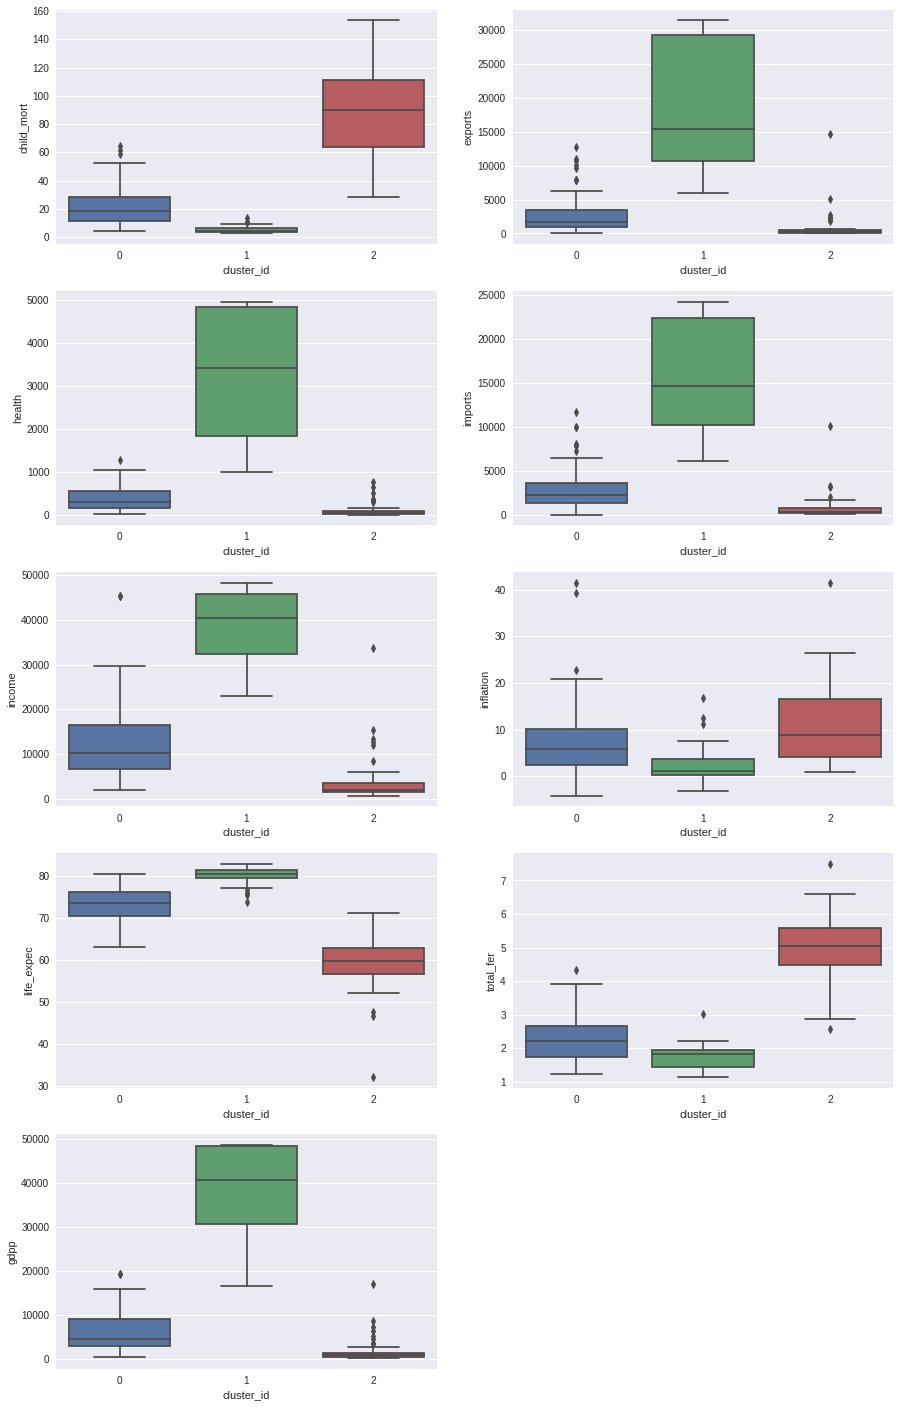

In [ ]:
# Visualizing Numerical columns using Boxplots
cols = country_df.columns[1:-1].tolist()
r = c = 0
fig,ax = plt.subplots(5,2,figsize=(15,25))

for n,i in enumerate(cols):
    sns.boxplot(x='cluster_id',y=cols[n], data=country_df,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

**Inferences:** 

Above plots suggests that **cluster_2** has lowest "life_expec", "income", "gdpp" and highest "child_mort" among all three clusters. Thus its clearly visible that countries which falls under **cluster_2** are in need of aid the most. Meanwhile, **cluster_0** and **cluster_1** are moderately and highly self sufficient respectively.

### **d) Clustering profiling using “gdpp" , "child_mort" and "income”**

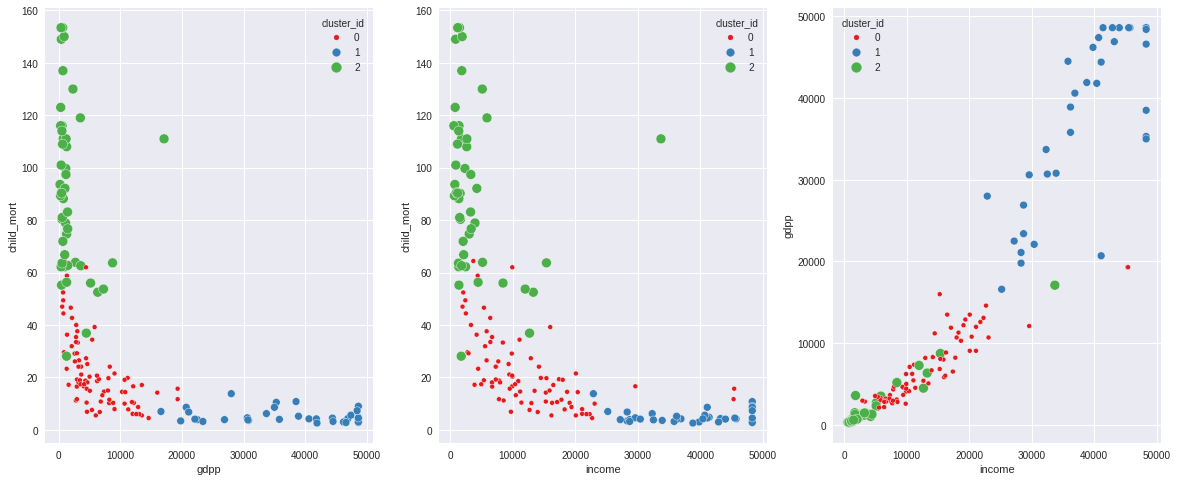

In [ ]:
fig = plt.figure(figsize=[20,8])

plt.subplot(1,3,1)
sns.scatterplot(data=country_df,x="gdpp",y="child_mort",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,2)
sns.scatterplot(data=country_df,x="income",y="child_mort",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,3)
sns.scatterplot(data=country_df,x="income",y="gdpp",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()

**Based on k-means clustering following are the countries which are in dire need of aid.**

In [ ]:
# Top 5 under developed countries ordered by "child_mort","gdpp","income"
country_df[country_df['cluster_id'] == 2].sort_values(["child_mort","gdpp","income"],ascending=[False,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399,2
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708,2


## **ii) Hierarchical Clustering**

### **a) Plot dendrogram using single and complete linkage**

####  **Dendrogram using single linkage**

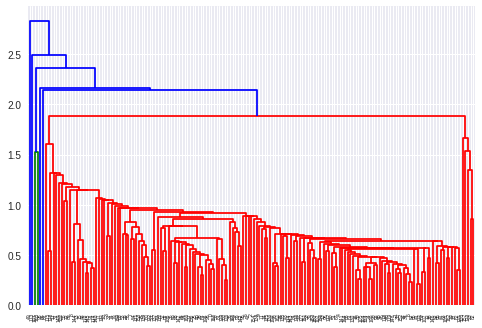

In [ ]:
single_den = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(single_den)
plt.show()

#### **Dendrogram using complete linkage**

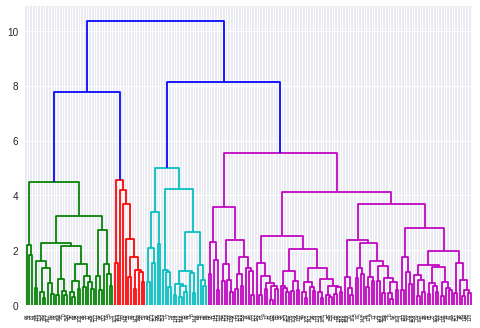

In [ ]:
comp_dend = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(comp_dend)
plt.show()

### **b) Choosing Optimal Linkage**

In [ ]:
# Single Linkage
cluster_labels = cut_tree(single_den, n_clusters=4).reshape(-1, )
country_df['cluster_id'] = cluster_labels
country_df['cluster_id'].value_counts()

0    163
2      2
3      1
1      1
Name: cluster_id, dtype: int64

In [ ]:
# Complete Linkage
cluster_labels = cut_tree(comp_dend, n_clusters=4).reshape(-1, )
country_df['cluster_id'] = cluster_labels
country_df['cluster_id'].value_counts()

1    99
0    33
2    23
3    12
Name: cluster_id, dtype: int64

**Inferences:**
- Based on above cluster distribution **"complete linkage"** seems to do better clustering compared to "single linkage", as the countries are more uniformly distributed per cluster. 
- Unlike k-means, for hierarchical clustering **k=4** seems to provide better results.

### **c) Visualizing clusters**

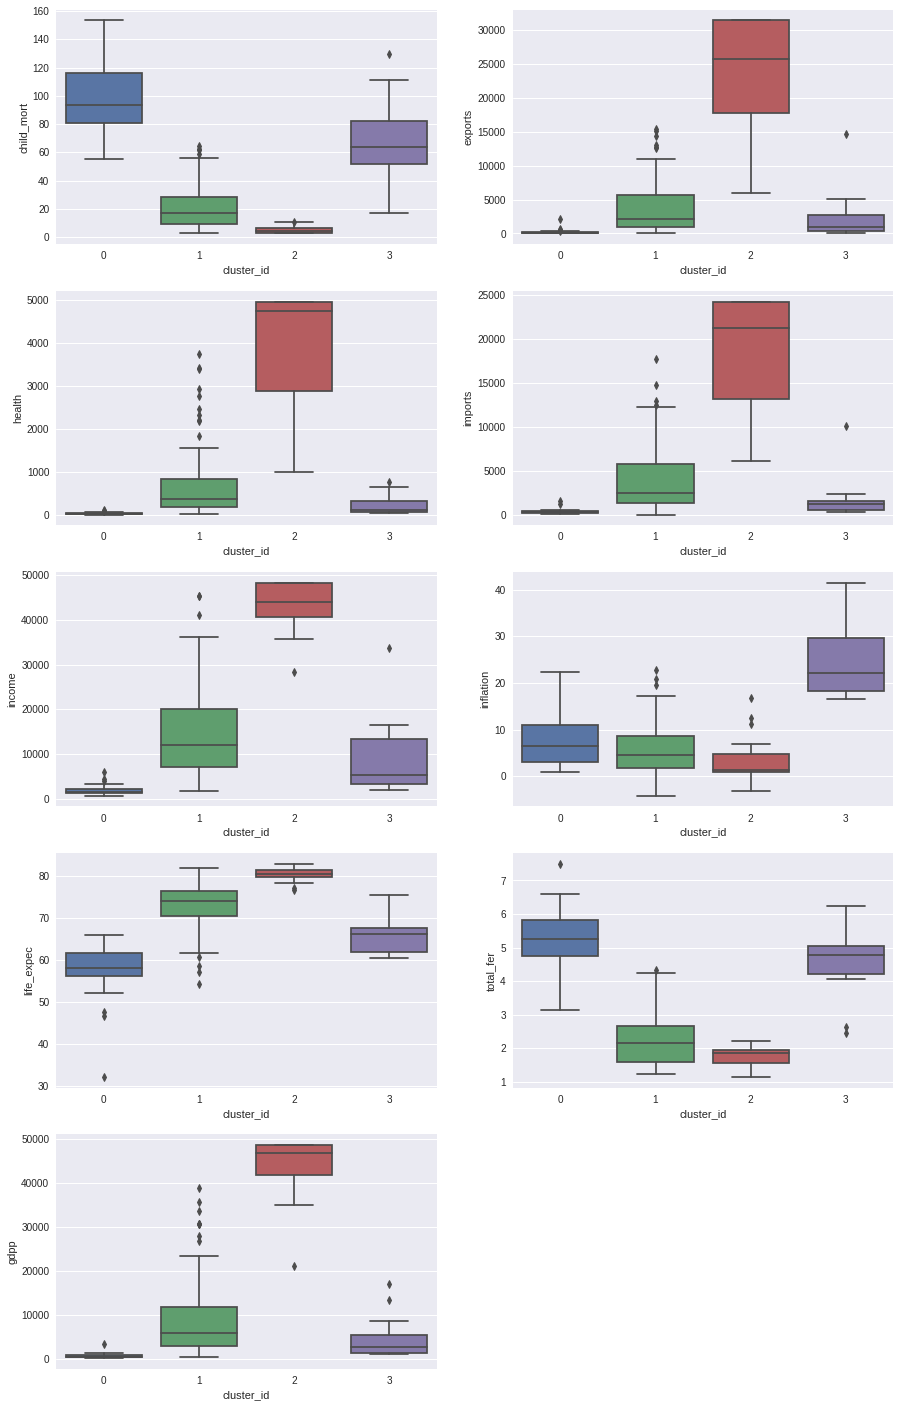

In [ ]:
# Visualizing Numerical columns using Boxplots
cols = country_df.columns[1:-1].tolist()
r = c = 0
fig,ax = plt.subplots(5,2,figsize=(15,25))

for n,i in enumerate(cols):
    sns.boxplot(x='cluster_id',y=cols[n], data=country_df,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

**Inferences:** 

Above plots suggests that **cluster_0** has lowest "life_expec", "income", "gdpp" and highest "child_mort" among all four clusters. Thus its clearly visible that countries which falls under **cluster_0** are in need of aid the most.

### **d) Clustering profiling using “gdpp" , "child_mort" and "income”**

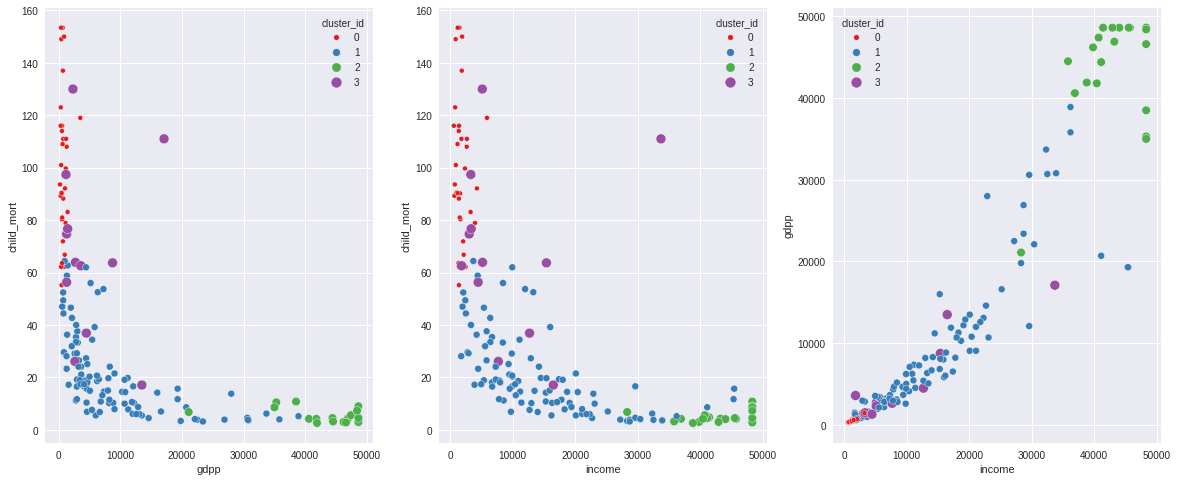

In [ ]:
fig = plt.figure(figsize=[20,8])

plt.subplot(1,3,1)
sns.scatterplot(data=country_df,x="gdpp",y="child_mort",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,2)
sns.scatterplot(data=country_df,x="income",y="child_mort",hue="cluster_id",size="cluster_id",palette="Set1")
plt.subplot(1,3,3)
sns.scatterplot(data=country_df,x="income",y="gdpp",hue="cluster_id",size="cluster_id",palette="Set1")
plt.show()

**Based on Hierarchical clustering following are the countries which are in dire need of aid.**

In [ ]:
country_df[country_df['cluster_id'] == 0].sort_values(["child_mort","gdpp","income"],ascending=[False,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399,0
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708,0


# **6. Country recommendation**

After performing k-means and hierarchical clustering list of **top 5** countries ordered by "child_mort", "gdpp" & "income" came out to be same.Thus the countries which need financial aid are:
- Sierra Leone
- Haiti
- Chad
- Central African Republic
- Mali